In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from scipy.stats.mstats import winsorize
import os
import seaborn as sns
import sklearn.metrics
from scipy import stats

In [4]:
data = pd.read_csv("oadedeji_project.csv")

In [5]:
os.remove("oadedeji_project.csv")  #This removes the initial csv files so a new one can be generated
data.to_csv("oadedeji_project.csv", index= False)

In [6]:
data

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
685,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
686,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
687,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [7]:
#To get the shape of the data
data.shape

(689, 16)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   b       689 non-null    object 
 1   30.83   689 non-null    object 
 2   0       689 non-null    float64
 3   u       689 non-null    object 
 4   g       689 non-null    object 
 5   w       689 non-null    object 
 6   v       689 non-null    object 
 7   1.25    689 non-null    float64
 8   t       689 non-null    object 
 9   t.1     689 non-null    object 
 10  01      689 non-null    int64  
 11  f       689 non-null    object 
 12  g.1     689 non-null    object 
 13  00202   689 non-null    object 
 14  0.1     689 non-null    int64  
 15  +       689 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.2+ KB


In [9]:
#To check all the unique values for all the columns
for column in data.columns:
    print(f"{column}: {data[column].unique()}")
    print("**********************************")

b: ['a' 'b' '?']
**********************************
30.83: ['58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42' '42.50'
 '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25' '21.83'
 '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58' '57.42'
 '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00' '27.75'
 '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00' '31.92'
 '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33' '23.17'
 '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67' '36.00'
 '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67' '34.08'
 '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67' '34.00'
 '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50' '37.50'
 '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75' '25.42'
 '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50' '47.67'
 '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58' '33.

#### It is observed that the null values are represented with question marks. These are replaced with null values. It wasn't obvious when the null values are checked initially because the question marks are also values. But we can see these missing values when the unique values in each column is checked.

#### Since + and - are the unique values in the + column, these are changed to numerical values using label encoding, such that + is 0 and - is 1.

In [10]:
encoder=LabelEncoder()
data["+"]=encoder.fit_transform(data["+"])

In [11]:
#To replace the null values
data = data.replace('?',np.nan )

In [12]:
#To check the null values
data.isnull().sum()

b        12
30.83    12
0         0
u         6
g         6
w         9
v         9
1.25      0
t         0
t.1       0
01        0
f         0
g.1       0
00202    13
0.1       0
+         0
dtype: int64

#### It is obvious there are some null values in the data, and the count of these null values is given above

### Data visualization of some columns

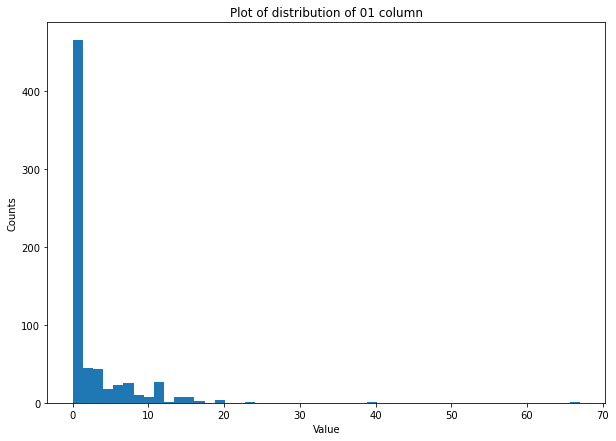

In [13]:
plt.figure(figsize=(10,7))
plt.title("Plot of distribution of 01 column")
plt.xlabel("Value")
plt.ylabel("Counts")
r = plt.hist(data["01"], bins = 50)

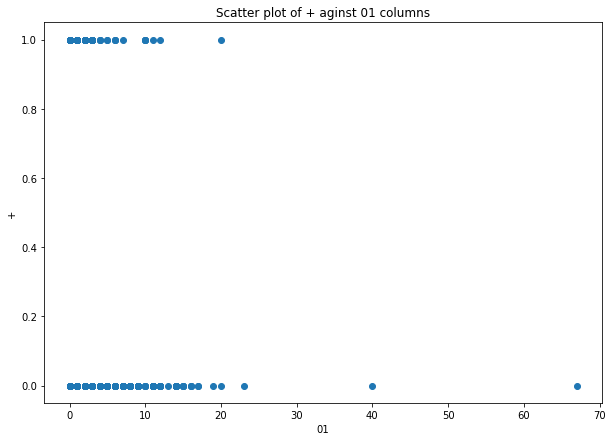

In [14]:
plt.figure(figsize=(10,7))
plt.title("Scatter plot of + aginst 01 columns")
plt.ylabel("+")
plt.xlabel("01")
plt.scatter(data["01"], data["+"])

[Text(0.5, 1.0, 'Viewing the outliers in 01 using boxplot')]

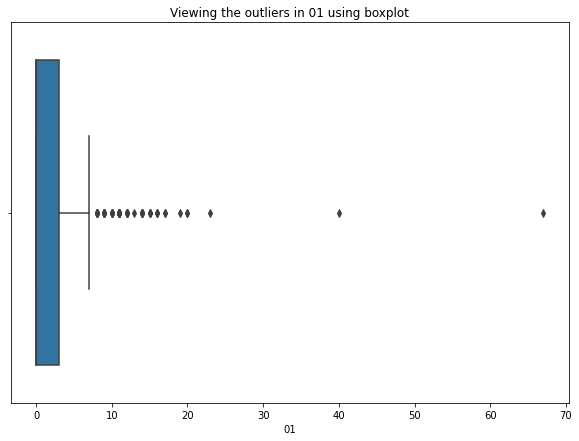

In [15]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x = data["01"]).set(title = "Viewing the outliers in 01 using boxplot")

In [16]:
mean = data["01"].mean()
print(f"The mean of the 01 column is {mean}")

The mean of the 01 column is 2.402031930333817


#### It is observed that there are some outliers which are as high as a value of as high as close to 70

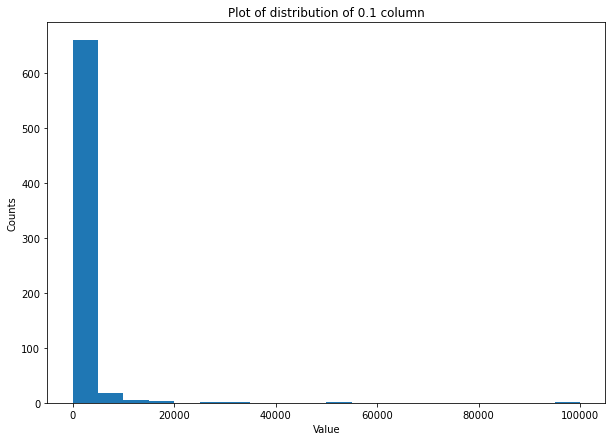

In [17]:
plt.figure(figsize=(10,7))
plt.title("Plot of distribution of 0.1 column")
plt.xlabel("Value")
plt.ylabel("Counts")
r = plt.hist(data["0.1"], bins = 20)

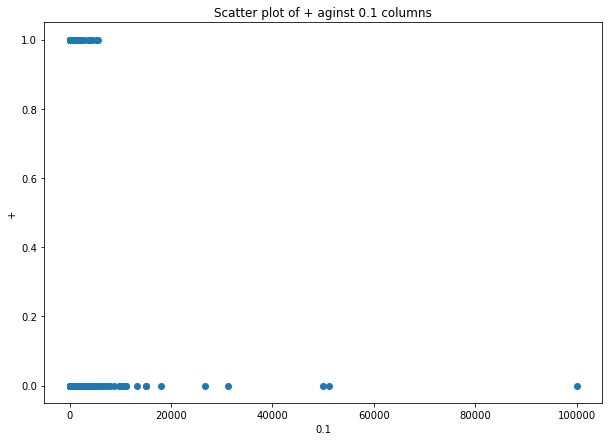

In [18]:
plt.figure(figsize=(10,7))
plt.title("Scatter plot of + aginst 0.1 columns")
plt.ylabel("+")
plt.xlabel("0.1")
plt.scatter(data["0.1"], data["+"])

[Text(0.5, 1.0, 'Viewing the outliers in 0.1 using boxplot')]

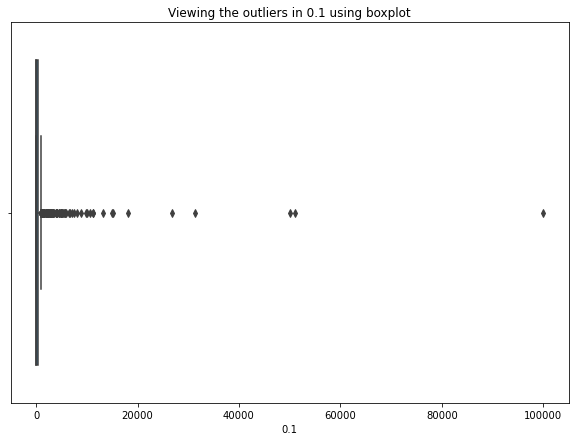

In [19]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x = data["0.1"]).set(title = "Viewing the outliers in 0.1 using boxplot")

In [20]:
mean = data["0.1"].mean()
print(f"The mean of the 0.1 column is {mean}")

The mean of the 0.1 column is 1018.8621190130624


#### It is observed that there are some outliers which are as high as a value 100000, which is far away from the mean. The outliers are outside the boxplot. It is always right skewed

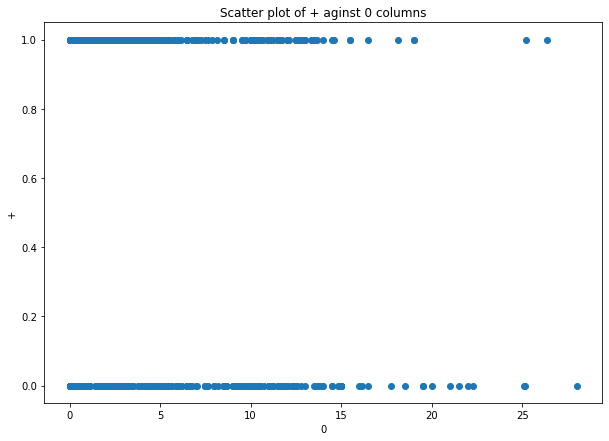

In [21]:
plt.figure(figsize=(10,7))
plt.title("Scatter plot of + aginst 0 columns")
plt.ylabel("+")
plt.xlabel("0")
plt.scatter(data["0"], data["+"])

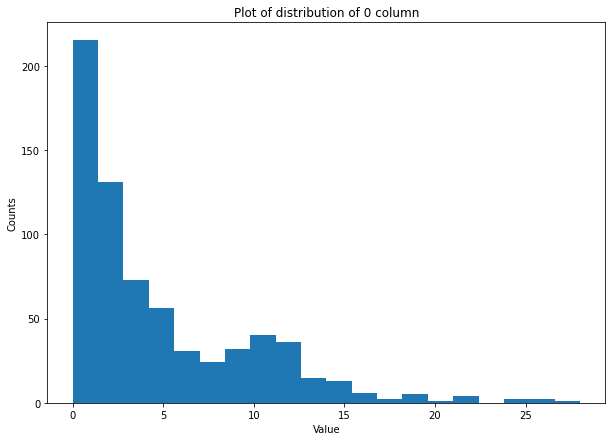

In [22]:
plt.figure(figsize=(10,7))
plt.title("Plot of distribution of 0 column")
plt.xlabel("Value")
plt.ylabel("Counts")
r = plt.hist(data["0"], bins = 20)

[Text(0.5, 1.0, 'Viewing the outliers in 0 using boxplot')]

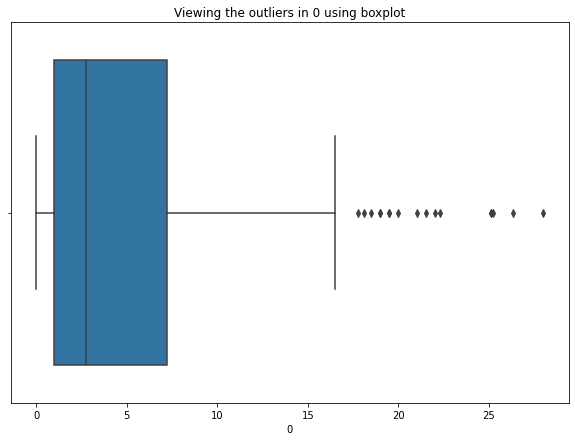

In [23]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x = data["0"]).set(title = "Viewing the outliers in 0 using boxplot")

In [24]:
mean = data["0"].mean()
print(f"The mean of the 0 column is {mean}")

The mean of the 0 column is 4.765631349782292


#### It is observed that some outliers exist which are as high as more than 25, which is much far away from the mean. The outliers are outside the boxplot. It is always right skewed

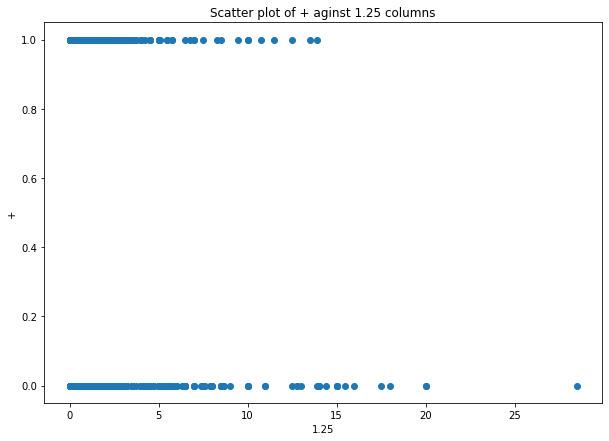

In [25]:
plt.figure(figsize=(10,7))
plt.title("Scatter plot of + aginst 1.25 columns")
plt.ylabel("+")
plt.xlabel("1.25")
plt.scatter(data["1.25"], data["+"])

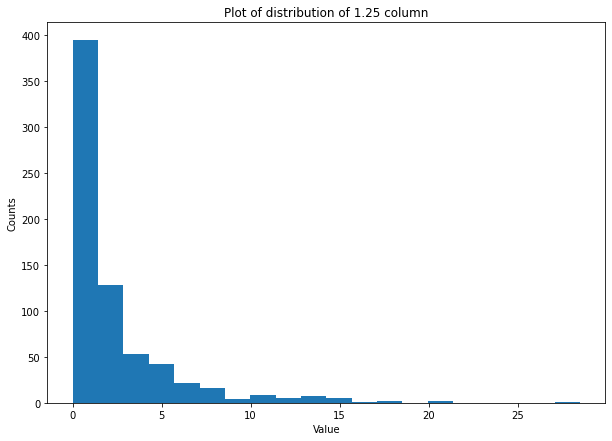

In [26]:
plt.figure(figsize=(10,7))
plt.title("Plot of distribution of 1.25 column")
plt.xlabel("Value")
plt.ylabel("Counts")
r = plt.hist(data["1.25"], bins = 20)

[Text(0.5, 1.0, 'Viewing the outliers in 1.25 using boxplot')]

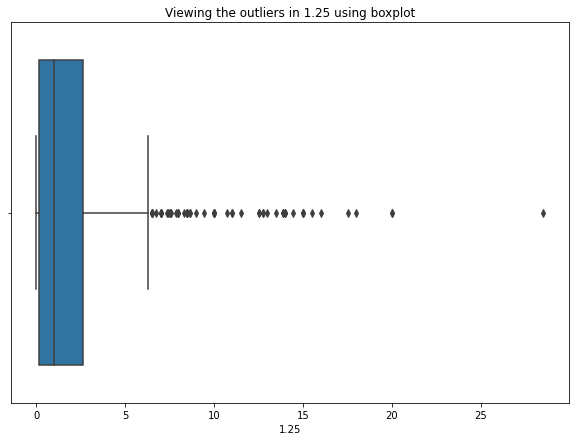

In [27]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x = data["1.25"]).set(title = "Viewing the outliers in 1.25 using boxplot")

In [28]:
mean = data["1.25"].mean()
print(f"The mean of the 1.25 column is {mean}")

The mean of the 1.25 column is 2.2248185776487643


#### It is observed some null values as high as more than 25 exist which is far away from the mean. The outliers are outside the boxplot. It is always right skewed

[Text(0.5, 1.0, 'Viewing the outliers in 30.83 using boxplot')]

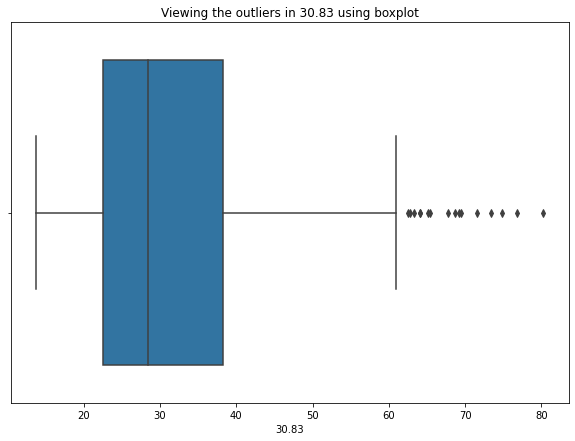

In [29]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x = data["30.83"].astype(float)).set(title = "Viewing the outliers in 30.83 using boxplot")

#### Again, it is observed that the data is right skewed and outliers exist towards the right

In [30]:
#Alternative way to check all the mean for numerical columns
data.mean()

0          4.765631
1.25       2.224819
01         2.402032
0.1     1018.862119
+          0.555878
dtype: float64

In [31]:
#Converts this column from a string to numerical value(float)
data["00202"] = pd.to_numeric(data["00202"])
data["30.83"] = pd.to_numeric(data["30.83"])

In [32]:
#Fill the null values in each column with the mean
data["30.83"]= data["30.83"].fillna(data["30.83"].mean())
data["00202"]= data["00202"].fillna(data["00202"].mean())

In [33]:
data

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,0
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,0
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,0
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,0
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,360.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,1
685,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,1
686,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,1
687,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,1


#### Since the features of the dataset are unknown and the some features have categorical data, it would be better to drop the rows with null values which have categorical data, especially since these are just few rows, when compared to the whole dataset(about 20 rows,which is just less than 3 percent of the dataset) 

In [34]:
data = data.dropna() 

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 670 entries, 0 to 688
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   b       670 non-null    object 
 1   30.83   670 non-null    float64
 2   0       670 non-null    float64
 3   u       670 non-null    object 
 4   g       670 non-null    object 
 5   w       670 non-null    object 
 6   v       670 non-null    object 
 7   1.25    670 non-null    float64
 8   t       670 non-null    object 
 9   t.1     670 non-null    object 
 10  01      670 non-null    int64  
 11  f       670 non-null    object 
 12  g.1     670 non-null    object 
 13  00202   670 non-null    float64
 14  0.1     670 non-null    int64  
 15  +       670 non-null    int32  
dtypes: float64(4), int32(1), int64(2), object(9)
memory usage: 86.4+ KB


### Now we deal with the outliers

In [36]:
columns_outliers = ["01", "0.1","0","1.25"]

In [37]:
for i in range(len(columns_outliers)):
    data[columns_outliers[i]] = winsorize(data[columns_outliers[i]], (0.01, 0.05))
    

<ipython-input-37-2950d76c959c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns_outliers[i]] = winsorize(data[columns_outliers[i]], (0.01, 0.05))


[Text(0.5, 1.0, 'Viewing the outliers in 0.1 using boxplot')]

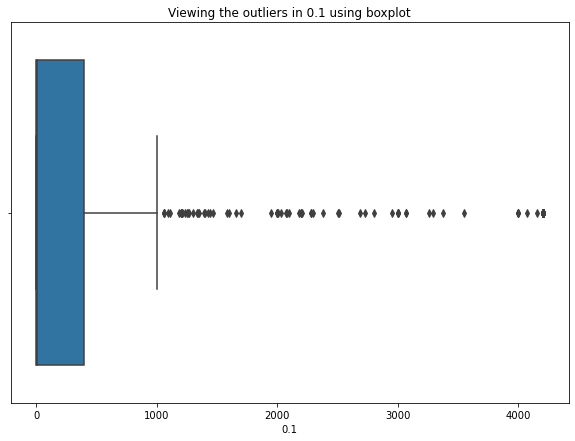

In [38]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x = data["0.1"]).set(title = "Viewing the outliers in 0.1 using boxplot")

#### It is observed that for column 0.1, although some outliers still exist the upper limit has been reduced from 100000 in the previous plot to about 4000. The limit passed into the winsorize function is lower quartile of 0.01 and a upper quartile of 0.95

[Text(0.5, 1.0, 'Viewing the outliers in 0 using boxplot')]

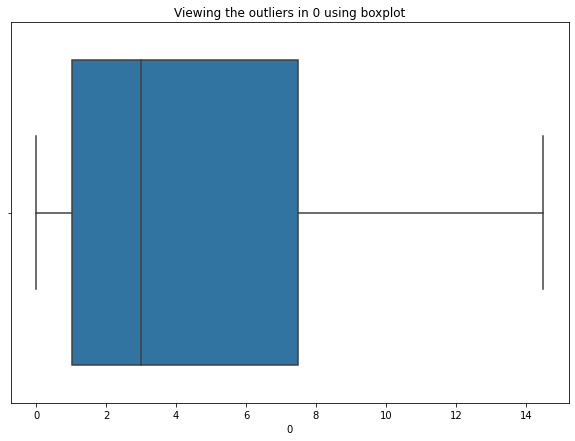

In [39]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x = data["0"]).set(title = "Viewing the outliers in 0 using boxplot")

#### It is observed that there is no more outliers after applying winsorize and trimming the data

[Text(0.5, 1.0, 'Viewing the outliers in 01 using boxplot')]

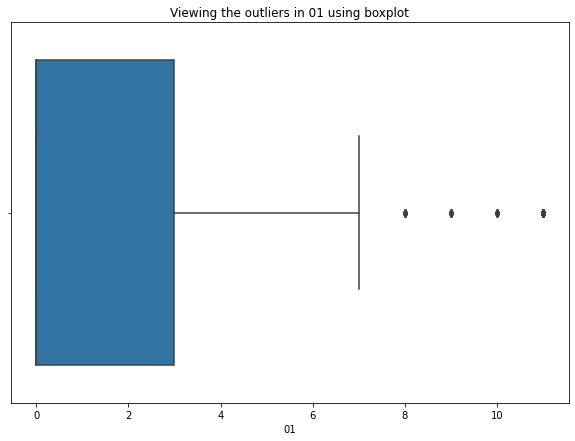

In [40]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x = data["01"]).set(title = "Viewing the outliers in 01 using boxplot")

#### Now it is observed that only a few outliers exist in this column

[Text(0.5, 1.0, 'Viewing the outliers in 1.25 using boxplot')]

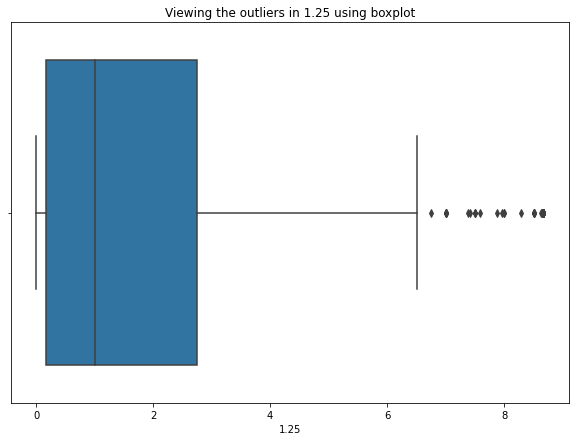

In [41]:
fig, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x = data["1.25"]).set(title = "Viewing the outliers in 1.25 using boxplot")

#### Again, it is observed that the limit is now reduced and just a few outliers exist now compared to the original data with plenty data and a lot of outliers

## One hot encoding is used to get dummies for the categorical data

In [42]:
encoded = pd.get_dummies(data=data[["b", "u","g","w","v","t","t.1","f","g.1"]],prefix=["b", "u","g","w","v","t","t.1","f","g.1"],drop_first=True)

In [43]:
encoded.columns

Index(['b_b', 'u_u', 'u_y', 'g_gg', 'g_p', 'w_c', 'w_cc', 'w_d', 'w_e', 'w_ff',
       'w_i', 'w_j', 'w_k', 'w_m', 'w_q', 'w_r', 'w_w', 'w_x', 'v_dd', 'v_ff',
       'v_h', 'v_j', 'v_n', 'v_o', 'v_v', 'v_z', 't_t', 't.1_t', 'f_t',
       'g.1_p', 'g.1_s'],
      dtype='object')

In [79]:
data[["b", "u","g","w","v","t","t.1","f","g.1"]].shape

(670, 9)

In [77]:
encoded.shape

(670, 31)

In [ ]:
data.shape

In [44]:
new_data = pd.concat([encoded, data.drop(["b", "u","g","w","v","t","t.1","f","g.1"], axis=1)],axis=1)

In [45]:
new_data.columns

Index(['b_b', 'u_u', 'u_y', 'g_gg', 'g_p', 'w_c', 'w_cc', 'w_d', 'w_e', 'w_ff',
       'w_i', 'w_j', 'w_k', 'w_m', 'w_q', 'w_r', 'w_w', 'w_x', 'v_dd', 'v_ff',
       'v_h', 'v_j', 'v_n', 'v_o', 'v_v', 'v_z', 't_t', 't.1_t', 'f_t',
       'g.1_p', 'g.1_s', '30.83', '0', '1.25', '01', '00202', '0.1', '+'],
      dtype='object')

In [46]:
new_data

,b_b,u_u,u_y,g_gg,g_p,w_c,w_cc,w_d,w_e,w_ff,...,f_t,g.1_p,g.1_s,30.83,0,1.25,01,00202,0.1,+
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,58.67,4.460,3.04,6,43.0,560,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,24.50,0.500,1.50,0,280.0,824,0
2,1,1,0,0,0,0,0,0,0,0,...,1,0,0,27.83,1.540,3.75,5,100.0,3,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,1,20.17,5.625,1.71,0,120.0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,1,0,0,32.08,4.000,2.50,0,360.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,1,0,1,0,1,0,0,0,1,0,...,0,0,0,21.08,10.085,1.25,0,260.0,0,1
685,0,1,0,0,0,1,0,0,0,0,...,1,0,0,22.67,0.750,2.00,2,200.0,394,1
686,0,0,1,0,1,0,0,0,0,1,...,1,0,0,25.25,13.500,2.00,1,200.0,1,1
687,1,1,0,0,0,0,0,0,0,0,...,0,0,0,17.92,0.205,0.04,0,280.0,750,1


In [47]:
#To check the datatype of the columns
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 670 entries, 0 to 688
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   b_b     670 non-null    uint8  
 1   u_u     670 non-null    uint8  
 2   u_y     670 non-null    uint8  
 3   g_gg    670 non-null    uint8  
 4   g_p     670 non-null    uint8  
 5   w_c     670 non-null    uint8  
 6   w_cc    670 non-null    uint8  
 7   w_d     670 non-null    uint8  
 8   w_e     670 non-null    uint8  
 9   w_ff    670 non-null    uint8  
 10  w_i     670 non-null    uint8  
 11  w_j     670 non-null    uint8  
 12  w_k     670 non-null    uint8  
 13  w_m     670 non-null    uint8  
 14  w_q     670 non-null    uint8  
 15  w_r     670 non-null    uint8  
 16  w_w     670 non-null    uint8  
 17  w_x     670 non-null    uint8  
 18  v_dd    670 non-null    uint8  
 19  v_ff    670 non-null    uint8  
 20  v_h     670 non-null    uint8  
 21  v_j     670 non-null    uint8  
 22  v_

#### Since some values weigh more than others, these columns are scaled

In [48]:
scaler=StandardScaler() 
new_data[["30.83","0","1.25","01","00202","0.1"]]=scaler.fit_transform(new_data[["30.83","0","1.25","01","00202","0.1"]])

In [49]:
new_data

,b_b,u_u,u_y,g_gg,g_p,w_c,w_cc,w_d,w_e,w_ff,...,f_t,g.1_p,g.1_s,30.83,0,1.25,01,00202,0.1,+
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,2.323578,-0.040393,0.414574,1.104364,-0.820015,0.030917,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,-0.595483,-0.937036,-0.208190,-0.623757,0.574996,0.271070,0
2,1,1,0,0,0,0,0,0,0,0,...,1,0,0,-0.311009,-0.701554,0.701693,0.816344,-0.484506,-0.475770,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,1,-0.965384,0.223392,-0.123267,-0.623757,-0.366784,-0.478499,0
4,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0.052058,-0.144549,0.196203,-0.623757,1.045885,-0.478499,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
684,1,0,1,0,1,0,0,0,1,0,...,0,0,0,-0.887645,1.233248,-0.309288,-0.623757,0.457273,-0.478499,1
685,0,1,0,0,0,1,0,0,0,0,...,1,0,0,-0.751815,-0.880430,-0.005993,-0.047717,0.104106,-0.120089,1
686,0,0,1,0,1,0,0,0,0,1,...,1,0,0,-0.531412,2.006489,-0.005993,-0.335737,0.104106,-0.477590,1
687,1,1,0,0,0,0,0,0,0,0,...,0,0,0,-1.157596,-1.003832,-0.798602,-0.623757,0.574996,0.203754,1


[Text(0.5, 1.0, 'Correlation matrix of the dataset')]

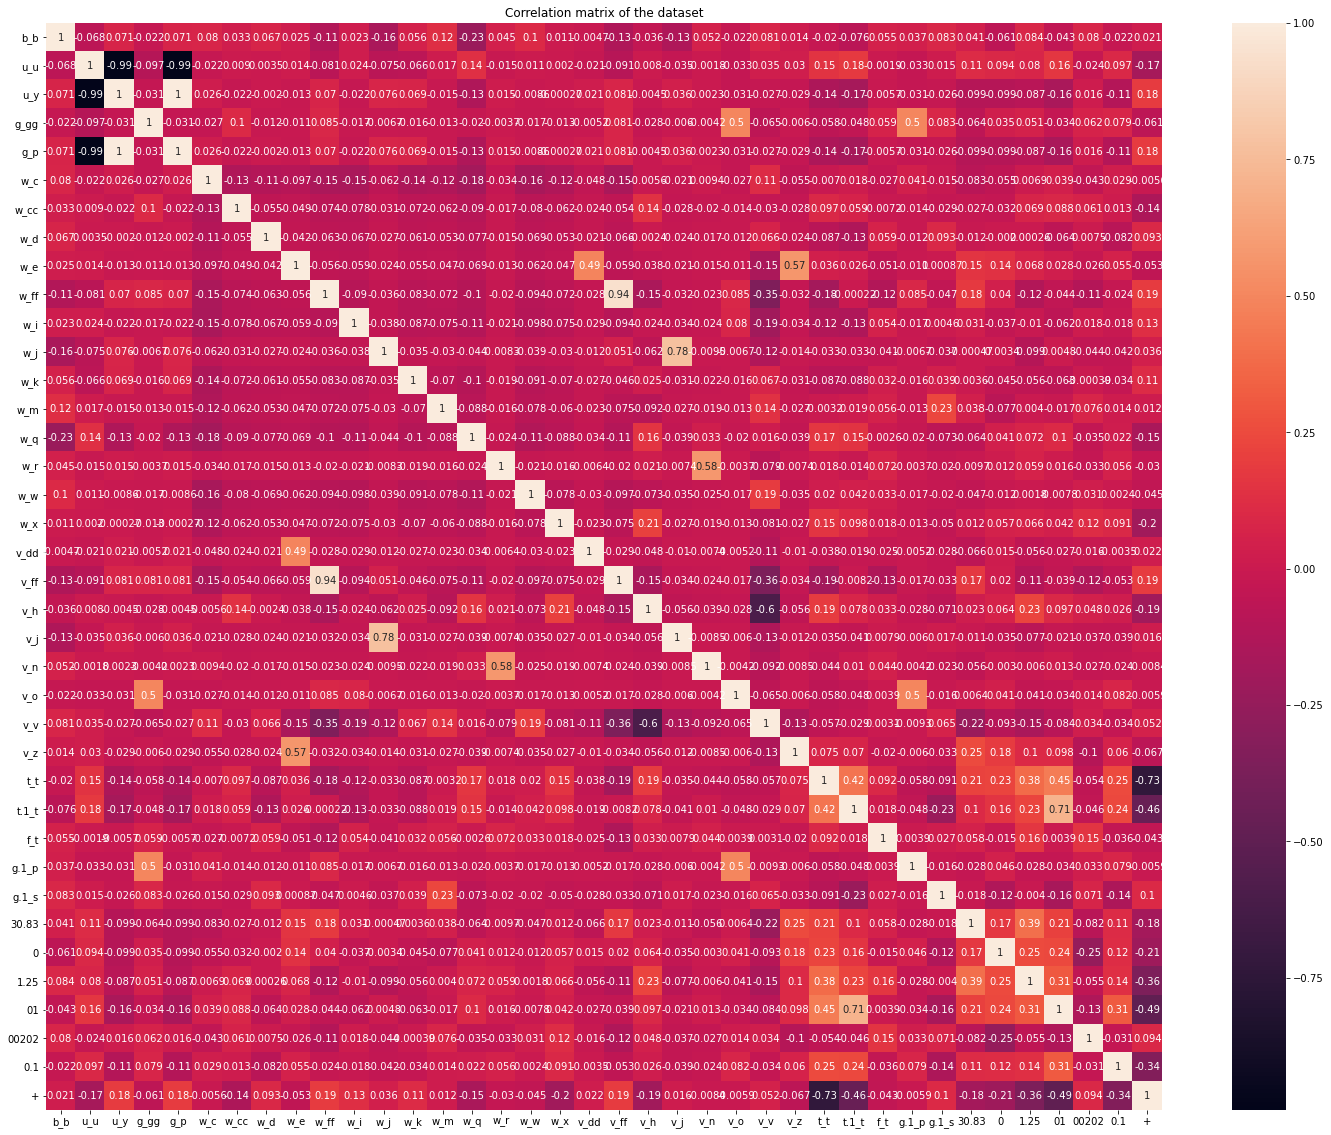

In [50]:
fig, ax = plt.subplots(figsize=(25,20))
sns.heatmap(new_data.corr(), annot = True).set(title ="Correlation matrix of the dataset")

#### The correlation between all the features and the dependent column (+) is shown here. It is observed that many of the features are weakly correlated with the + column(i.e, they have a a correlation coefficient of around 0 to +/-0.2. The t feature is strongly negatively correlated with + column. 

#### Independent and dependent variables

In [51]:
X = new_data.drop("+", axis = 1)
y= new_data["+"]

### Model

In [52]:
clf = MLPClassifier(random_state=1, max_iter = 5000)

In [53]:
#To check a list of all the relevant metrics
sorted(sklearn.metrics.SCORERS.keys()) 

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [54]:
cv =KFold(n_splits=10,shuffle=False)

In [55]:
cv

KFold(n_splits=10, random_state=None, shuffle=False)

In [56]:
accuracy = cross_val_score(clf, X,y,cv= cv,scoring ="accuracy")
print(f"The precision of the model is {accuracy.mean()}")

The precision of the model is 0.8119402985074625


In [57]:
accuracies = []
accuracies.append(accuracy.mean())

In [58]:
precision = cross_val_score(clf, X,y,cv= cv,scoring ="precision")
print(f"The precision of the model is {precision.mean()}")

The precision of the model is 0.6893823929693494


In [59]:
precisions = []
precisions.append(precision.mean())

#### The accuracy tests the ratio of sum of true positive and true negatives, and all the outputs derived (i.e sum of true positive, true negative, false positive, false negative). Likewise, the precision computes the total number of true positives divided by the sum of true and false positives. This is because we do not want too many false profits which increases our risk. 

#### It should be noted that for computing more than one parameter at a go, cross_validate can also be used. 

### Hyperparameter Tuning

In [60]:
clf = MLPClassifier(random_state=1, max_iter = 5000)

In [61]:

#activation_func = ["identity", "logistic", "tanh", "relun"]
#solver =  ["lbfgs", "sgd", "adam"]
#learning_rate = ["constant", "invscaling", "adaptive"]

In [62]:
parameters={
             "activation" : ["identity", "logistic", "tanh", "relun"],\
             "solver" : ["lbfgs", "sgd", "adam"],\
             "learning_rate" : ["constant", "invscaling", "adaptive"]\
             }

In [63]:
gd_search=GridSearchCV(estimator=clf, param_grid=parameters,cv=cv, n_jobs=1,verbose=2,scoring='accuracy')

In [64]:
#This takes awhile to run
gd_search.fit(X,y)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END activation=identity, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, learning_rate=constant, solver=lbfgs; total time=   0.3s
[CV] END activation=identity, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, learning_rate=constant, solver=lbfgs; total time=   0.1s
[CV] END activation=identity, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=identity, learning_rate=constant, solver=sgd; t

[CV] END activation=logistic, learning_rate=constant, solver=lbfgs; total time=   0.4s
[CV] END activation=logistic, learning_rate=constant, solver=lbfgs; total time=   0.5s
[CV] END activation=logistic, learning_rate=constant, solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, learning_rate=constant, solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, learning_rate=constant, solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, learning_rate=constant, solver=lbfgs; total time=   0.3s
[CV] END activation=logistic, learning_rate=constant, solver=sgd; total time=   6.2s
[CV] END activation=logistic, learning_rate=constant, solver=sgd; total time=   7.0s
[CV] END activation=logistic, learning_rate=constant, solver=sgd; total time=   4.3s
[CV] END activation=logistic, learning_rate=constant, solver=sgd; total time=   6.5s
[CV] END activation=logistic, learning_rate=constant, solver=sgd; total time=   7.1s
[CV] END activation=logistic, learning_rate=constant,

[CV] END activation=tanh, learning_rate=constant, solver=lbfgs; total time=   0.2s
[CV] END activation=tanh, learning_rate=constant, solver=sgd; total time=   3.5s
[CV] END activation=tanh, learning_rate=constant, solver=sgd; total time=   4.0s
[CV] END activation=tanh, learning_rate=constant, solver=sgd; total time=   3.2s
[CV] END activation=tanh, learning_rate=constant, solver=sgd; total time=   4.0s
[CV] END activation=tanh, learning_rate=constant, solver=sgd; total time=   3.2s
[CV] END activation=tanh, learning_rate=constant, solver=sgd; total time=   2.6s
[CV] END activation=tanh, learning_rate=constant, solver=sgd; total time=   3.3s
[CV] END activation=tanh, learning_rate=constant, solver=sgd; total time=   3.4s
[CV] END activation=tanh, learning_rate=constant, solver=sgd; total time=   3.9s
[CV] END activation=tanh, learning_rate=constant, solver=sgd; total time=   3.8s
[CV] END activation=tanh, learning_rate=constant, solver=adam; total time=   1.6s
[CV] END activation=tanh,

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\Hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 357, in _fit
    self._validate_hyperparameters()
  File "C:\Users\Hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 448, in _validate_hyperparameters
    raise ValueError("The activation '%s' is not supported. Supported "
ValueError: The activation 'relun' is not supported. Suppo

[CV] END activation=relun, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=relun, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relun, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relun, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relun, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relun, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relun, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relun, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relun, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relun, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relun, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=relun, learning_rate=invscaling, solver=adam; total ti

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\Hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 357, in _fit
    self._validate_hyperparameters()
  File "C:\Users\Hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 448, in _validate_hyperparameters
    raise ValueError("The activation '%s' is not supported. Supported "
ValueError: The activation 'relun' is not supported. Suppo

[CV] END activation=relun, learning_rate=adaptive, solver=sgd; total time=   0.0s
[CV] END activation=relun, learning_rate=adaptive, solver=sgd; total time=   0.0s
[CV] END activation=relun, learning_rate=adaptive, solver=sgd; total time=   0.0s
[CV] END activation=relun, learning_rate=adaptive, solver=sgd; total time=   0.0s
[CV] END activation=relun, learning_rate=adaptive, solver=sgd; total time=   0.0s
[CV] END activation=relun, learning_rate=adaptive, solver=sgd; total time=   0.0s
[CV] END activation=relun, learning_rate=adaptive, solver=sgd; total time=   0.0s
[CV] END activation=relun, learning_rate=adaptive, solver=sgd; total time=   0.0s
[CV] END activation=relun, learning_rate=adaptive, solver=sgd; total time=   0.0s
[CV] END activation=relun, learning_rate=adaptive, solver=sgd; total time=   0.0s
[CV] END activation=relun, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activation=relun, learning_rate=adaptive, solver=adam; total time=   0.0s
[CV] END activ

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 673, in fit
    return self._fit(X, y, incremental=False)
  File "C:\Users\Hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 357, in _fit
    self._validate_hyperparameters()
  File "C:\Users\Hp\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 448, in _validate_hyperparameters
    raise ValueError("The activation '%s' is not supported. Supported "
ValueError: The activation 'relun' is not supported. Suppo

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=MLPClassifier(max_iter=5000, random_state=1), n_jobs=1,
             param_grid={'activation': ['identity', 'logistic', 'tanh',
                                        'relun'],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive'],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='accuracy', verbose=2)

In [65]:
accuracy = pd.DataFrame(gd_search.cv_results_)

In [66]:
accuracy

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_learning_rate,param_solver,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.279756,0.039879,0.005420,0.000849,identity,constant,lbfgs,"{'activation': 'identity', 'learning_rate': 'c...",0.805970,0.373134,...,0.850746,0.895522,0.985075,1.000000,0.671642,0.880597,0.955224,0.828358,0.176505,1
1,1.875973,0.175493,0.005494,0.000570,identity,constant,sgd,"{'activation': 'identity', 'learning_rate': 'c...",0.791045,0.328358,...,0.820896,0.880597,0.970149,0.970149,0.731343,0.865672,0.970149,0.819403,0.180523,9
2,0.812713,0.115069,0.005897,0.000648,identity,constant,adam,"{'activation': 'identity', 'learning_rate': 'c...",0.761194,0.358209,...,0.820896,0.880597,0.970149,1.000000,0.656716,0.880597,0.955224,0.817910,0.181550,10
3,0.286568,0.020275,0.005789,0.001060,identity,invscaling,lbfgs,"{'activation': 'identity', 'learning_rate': 'i...",0.805970,0.373134,...,0.850746,0.895522,0.985075,1.000000,0.671642,0.880597,0.955224,0.828358,0.176505,1
4,0.511095,0.139285,0.005272,0.001393,identity,invscaling,sgd,"{'activation': 'identity', 'learning_rate': 'i...",0.149254,0.716418,...,0.373134,0.835821,0.970149,1.000000,0.552239,0.447761,0.970149,0.625373,0.301215,25
5,0.782882,0.121321,0.005622,0.000853,identity,invscaling,adam,"{'activation': 'identity', 'learning_rate': 'i...",0.761194,0.358209,...,0.820896,0.880597,0.970149,1.000000,0.656716,0.880597,0.955224,0.817910,0.181550,10
6,0.291088,0.036963,0.005477,0.000922,identity,adaptive,lbfgs,"{'activation': 'identity', 'learning_rate': 'a...",0.805970,0.373134,...,0.850746,0.895522,0.985075,1.000000,0.671642,0.880597,0.955224,0.828358,0.176505,1
7,2.153432,0.186310,0.005538,0.001241,identity,adaptive,sgd,"{'activation': 'identity', 'learning_rate': 'a...",0.791045,0.328358,...,0.805970,0.880597,0.970149,0.970149,0.716418,0.865672,0.970149,0.816418,0.181336,13
8,0.795960,0.065754,0.005855,0.000966,identity,adaptive,adam,"{'activation': 'identity', 'learning_rate': 'a...",0.761194,0.358209,...,0.820896,0.880597,0.970149,1.000000,0.656716,0.880597,0.955224,0.817910,0.181550,10
9,0.470159,0.070298,0.005714,0.001014,logistic,constant,lbfgs,"{'activation': 'logistic', 'learning_rate': 'c...",0.820896,0.462687,...,0.791045,0.850746,0.910448,0.925373,0.671642,0.805970,0.895522,0.797015,0.131004,17


In [67]:
gd_search.best_params_

{'activation': 'identity', 'learning_rate': 'constant', 'solver': 'lbfgs'}

In [68]:
clf  = MLPClassifier(activation = "identity", learning_rate = "constant", solver = "lbfgs", random_state=1, max_iter = 5000)

In [69]:
optimal_accuracy = cross_val_score(clf, X,y,cv= cv,scoring ="accuracy")
print(f"The precision of the model is {optimal_accuracy.mean()}")

The precision of the model is 0.8283582089552238


In [70]:
accuracies.append(optimal_accuracy.mean())

In [71]:
optimal_precision = cross_val_score(clf, X,y,cv= cv,scoring ="precision")
print(f"The precision of the model is {optimal_precision.mean()}")

The precision of the model is 0.6928175206436075


In [72]:
precisions.append(optimal_precision.mean())

In [73]:
models = ["ordinary model", "optimal"]

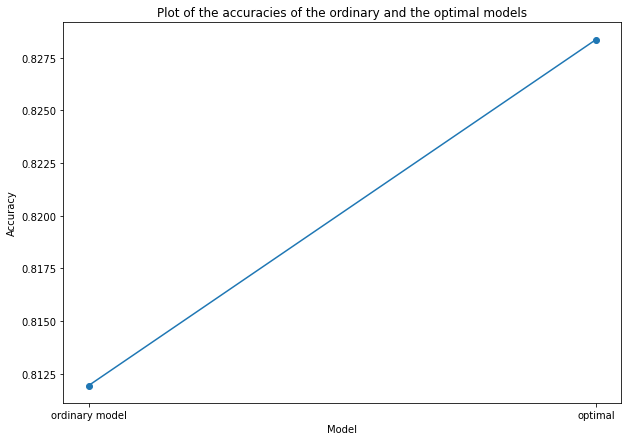

In [74]:
plt.figure(figsize=(10,7))
plt.title("Plot of the accuracies of the ordinary and the optimal models")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.plot(models, accuracies, "-o")

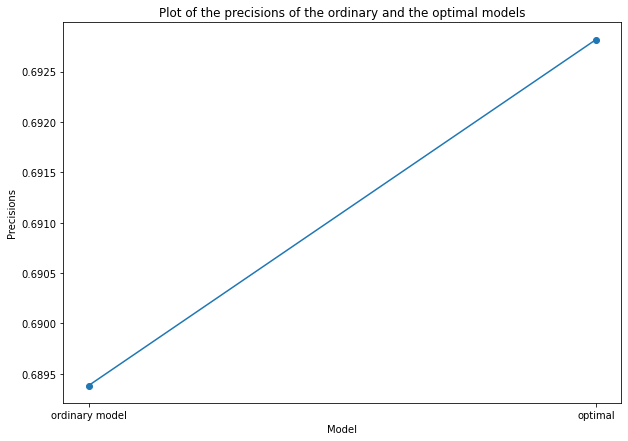

In [75]:
plt.figure(figsize=(10,7))
plt.title("Plot of the precisions of the ordinary and the optimal models")
plt.ylabel("Precisions")
plt.xlabel("Model")
plt.plot(models, precisions, "-o")

#### It is observed that the hypertuned model with the optimal parameters did better than the ordinary model.